# Project: No show appointments analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

    In this project, we will analyze data associated with attendance or not in scheduled appointments. in particular, we will be interested in looking for trends associated with attending an appointmen using the database as the basis of our research. Our data set presents data from Brazilian medical offices and provides us with a variety of information regarding consultations and the patient who made the appointment.
    We will analyze, based on the patient's attendance or not, sex, age, and if they received a reminder SMS.

In [1]:
# importing packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

    In this section we will look at the information provided by the data and look for duplicate lines, missing values ​​and, if necessary, correct them. we will also look at the information that is not considered relevant in this study and drop it.

### General Properties

In [2]:
# loading data
df = pd.read_csv('no_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


    The first two pieces of information provided by the data set are the patient identification and the appointment identification. next we have the patient's gender followed by two pieces of information about the day it was scheduled and for which specific date. then we have the patient's age, the place where the appointment is scheduled and if the person receives financial support from the family allowance. the next four columns show whether the patient has any of the three selected diseases, or more than one and handcap. Finally, the last two columns show whether or not the patient received an SMS about the appointment and whether or not he attended.

> Now, we seek to better understand the available data.

In [64]:
df.shape

(110527, 14)

Our data set has 110527 entries and 12 columns.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can see that the set has no values ​​missing from any column. now we look for duplicate values.

In [66]:
df.duplicated().sum()

0

The table does not have duplicate values, so there is no need to discard or modify row.

In [67]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


It does not make sense to analyze the passenger id or the appoitment id, as well as the consultation and scheduling dates, for the questions we had done. we can see that 38% of the people who made the appointment received a remainder sms. The average age of the people is 37 years old, the youngest seems to be a baby that has not born yet, the oldest to schedule is 115 years old and the a maior parte das pessoas que agendaram tem , em média, 55 anos.. Less than 10% of people receive the Bolsa Família (scholarship) and the most common disease appears to be hypertension with almost 20%.

### Excluding errors and values that will not be used

> To facilitate data handling we make the following change to the label.

In [3]:
# replace spaces with underscores, hyphen and lowercase labels for dataset
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_").replace("-", "_"), inplace=True)

# confirm changes
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [4]:
df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday', 'neighbourhood', 'handcap'], axis=1, inplace=True)
df.head()

,gender,age,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show
0,F,62,0,1,0,0,0,No
1,M,56,0,0,0,0,0,No
2,F,62,0,0,0,0,0,No
3,F,8,0,0,0,0,0,No
4,F,56,0,1,1,0,0,No


In [5]:
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

In [6]:
df.no_show.replace(('Yes', 'No'), (0, 1), inplace=True)

In [7]:
df.head()

,gender,age,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show
0,F,62,0,1,0,0,0,1
1,M,56,0,0,0,0,0,1
2,F,62,0,0,0,0,0,1
3,F,8,0,0,0,0,0,1
4,F,56,0,1,1,0,0,1


First, let's take a look at the general data histogram.

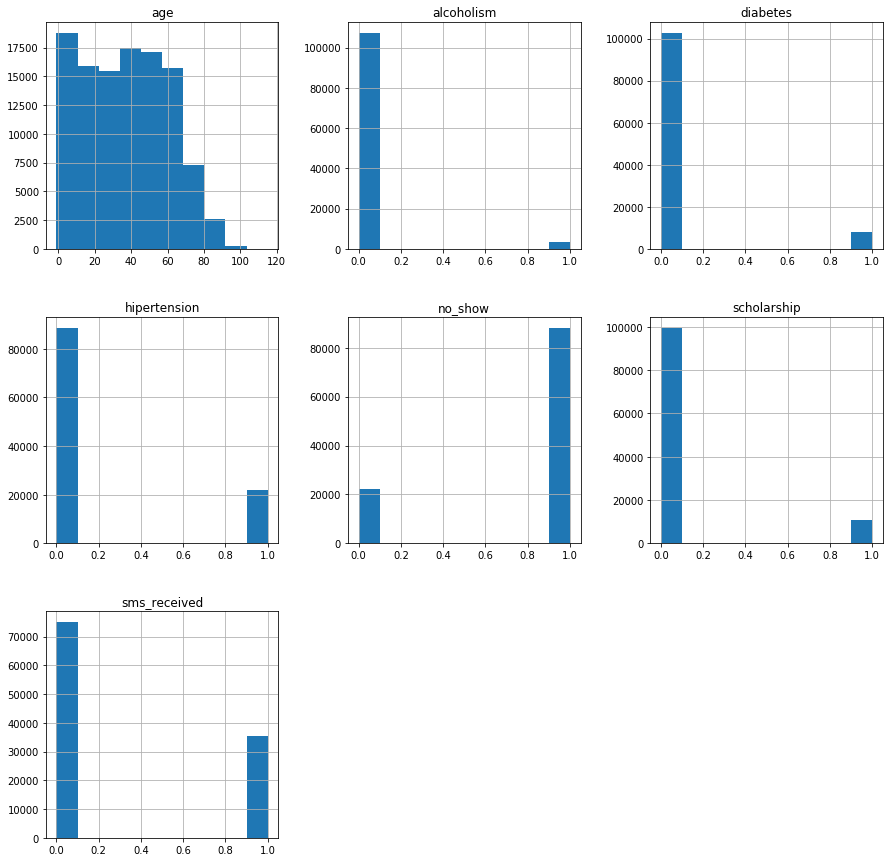

In [8]:
df.hist(figsize = (15, 15));

### Which genre is least likely to attend scheduled appointments?

In [24]:
show = df.no_show == True
noshow = df.no_show == False

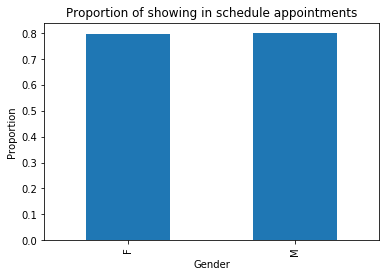

In [95]:
df.groupby('gender').no_show.mean().plot(kind='bar')
# title and labels
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.title('Proportion of showing in schedule appointments');

Men and women show similar behavior regarding the show or not.

### Older people show more or less than jung in schedule appoitments?

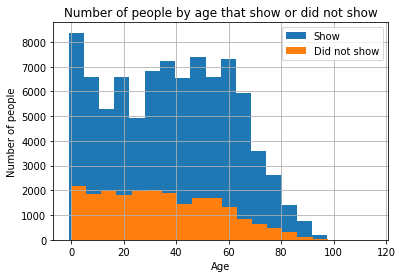

In [90]:
df.age[show].hist(bins = 20, label = 'Show')
df.age[noshow].hist(bins = 20, label = 'Did not show');
plt.ylabel('Number of people')
plt.xlabel('Age')
plt.title('Number of people by age that show or did not show');
plt.legend();

It seems that people around the firsts years, around the 20 and between 30 and 60 years old, proportionately, show more in scheduled appointments.

### Does sending messages reminding you of an appointment have a positive effect?

In [108]:
received = df.sms_received == True
noreceived = df.sms_received == False

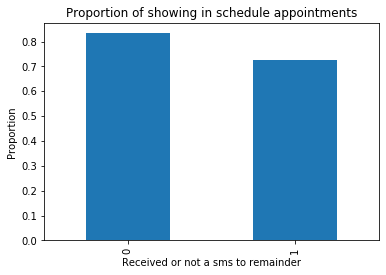

In [110]:
df.groupby('sms_received').no_show.mean().plot(kind='bar')
# title and labels
plt.ylabel('Proportion')
plt.xlabel('Received or not a sms to remainder')
plt.title('Proportion of showing in schedule appointments');

Apparently, notifying them by message of an appointment does not improve the chances of the person attending.

<a id='conclusions'></a>
## Conclusions

Apparently notifying them by message of an appointment does not improve the chances of the person attending. Women go to the doctor more but, proportionally, they have the same problem of not attending as men and messages helping to remember appointments don't seem to have much effect.